In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
df = pd.read_csv("/work/AA4_Data_FormC.csv")

In [3]:
print(df.head())

   Observations / Segmentation Variables  Innov  ConstCom  CreatCom  \
0                                      1      3         3         5   
1                                      2      5         6         2   
2                                      3      7         7         3   
3                                      4      4         7         4   
4                                      5      7         7         2   

   TimelyInf  SaveM_T  SaveM_L  TaskMgm  DeviceSt  Photo  Wellness  Athlete  \
0          2        4        4        3         3      3         2        3   
1          6        2        4        6         6      2         5        3   
2          4        2        4        4         4      1         6        4   
3          5        3        3        4         5      1         5        4   
4          4        2        4        2         6      1         3        2   

   Style  Price  
0      3    200  
1      1    350  
2      1    220  
3      4    320  
4      4

In [4]:
import pandas as pd

# Correcting the file path by using a raw string or escaping backslashes
file_path = r"/work/AA4_Data_FormD.csv"

df2 = pd.read_csv(file_path)

print(df2.head())

   Observations / Discrimination Variables  iPhone  CompBuy  Health  Finc  \
0                                        1       0        0       0     0   
1                                        2       1        0       1     0   
2                                        3       0        0       1     0   
3                                        4       1        1       1     0   
4                                        5       0        1       1     0   

   Sales  Advt  Edu  Cons  Eng  ...  Snap  YouTube  Pod_radio  TV  NewsP  \
0      0     1    0     0    0  ...     0        0          0   1      0   
1      0     0    0     0    0  ...     1        1          1   0      1   
2      0     0    0     0    0  ...     0        1          1   1      1   
3      0     0    0     0    0  ...     1        1          1   0      1   
4      0     0    0     0    0  ...     1        1          1   1      1   

   AmznP  Age  Female  Degree  Income  
0      1   38       1       1       2  


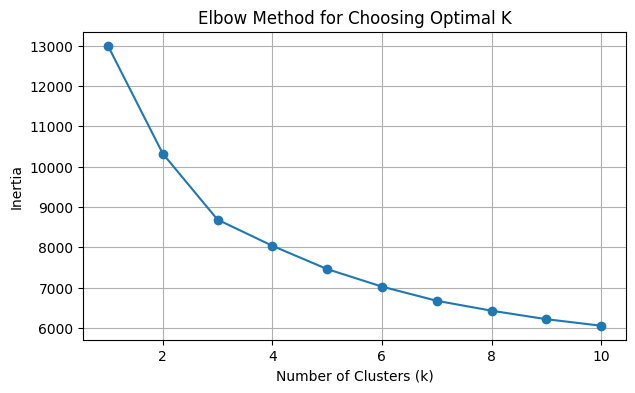

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1️ Select only numeric segmentation variables (drop any ID column)
seg_cols = [c for c in df.columns if c != "Observations / Segmentation Variables"]
X = df[seg_cols]

# 2️ Standardize variables (so all have equal weight)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️ Compute KMeans inertia for k = 1 to 10
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4️ Plot the elbow curve
plt.figure(figsize=(7,4))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Choosing Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [6]:
from sklearn.cluster import KMeans

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels back to the dataset
df['Cluster'] = kmeans.labels_

# Preview the data with assigned clusters
df.head(500)


,Observations / Segmentation Variables,Innov,ConstCom,CreatCom,TimelyInf,SaveM_T,SaveM_L,TaskMgm,DeviceSt,Photo,Wellness,Athlete,Style,Price,Cluster
0,1,3,3,5,2,4,4,3,3,3,2,3,3,200,1
1,2,5,6,2,6,2,4,6,6,2,5,3,1,350,2
2,3,7,7,3,4,2,4,4,4,1,6,4,1,220,2
3,4,4,7,4,5,3,3,4,5,1,5,4,4,320,2
4,5,7,7,2,4,2,4,2,6,1,3,2,4,250,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,3,5,2,5,2,4,5,5,1,4,2,4,230,2
496,497,3,4,5,4,4,3,3,3,3,3,3,4,200,1
497,498,6,7,2,7,2,4,7,6,2,1,1,3,210,2
498,499,6,5,5,4,4,6,4,7,3,7,5,6,220,3


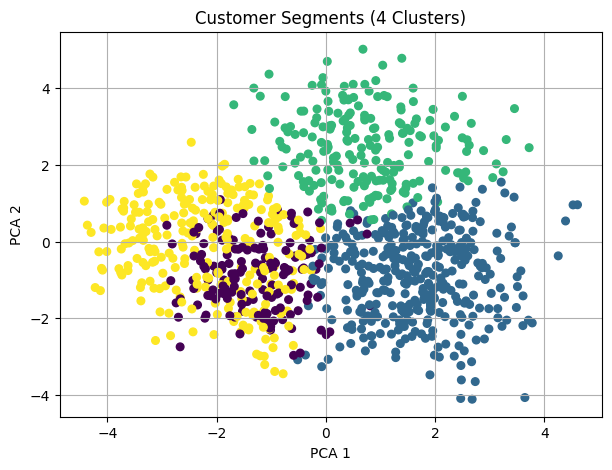

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data from 13D to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add PCA results to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(7, 5))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', s=30)
plt.title("Customer Segments (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [8]:
df['Cluster'].value_counts()

Cluster
1    375
3    260
2    207
0    158
Name: count, dtype: int64

In [9]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans3.fit_predict(X_scaled)
df['Cluster'] = kmeans3.fit_predict(X_scaled)

# Preview the data with assigned clusters
df.head(500)

,Observations / Segmentation Variables,Innov,ConstCom,CreatCom,TimelyInf,SaveM_T,SaveM_L,TaskMgm,DeviceSt,Photo,Wellness,Athlete,Style,Price,Cluster,PCA1,PCA2
0,1,3,3,5,2,4,4,3,3,3,2,3,3,200,1,1.985693,-1.480100
1,2,5,6,2,6,2,4,6,6,2,5,3,1,350,2,0.305103,3.818295
2,3,7,7,3,4,2,4,4,4,1,6,4,1,220,2,0.235755,1.862602
3,4,4,7,4,5,3,3,4,5,1,5,4,4,320,2,-0.466549,2.205182
4,5,7,7,2,4,2,4,2,6,1,3,2,4,250,2,0.778161,2.665023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,3,5,2,5,2,4,5,5,1,4,2,4,230,2,0.945881,2.465558
496,497,3,4,5,4,4,3,3,3,3,3,3,4,200,1,1.393948,-0.839923
497,498,6,7,2,7,2,4,7,6,2,1,1,3,210,2,1.063325,3.815113
498,499,6,5,5,4,4,6,4,7,3,7,5,6,220,0,-3.090491,0.151815


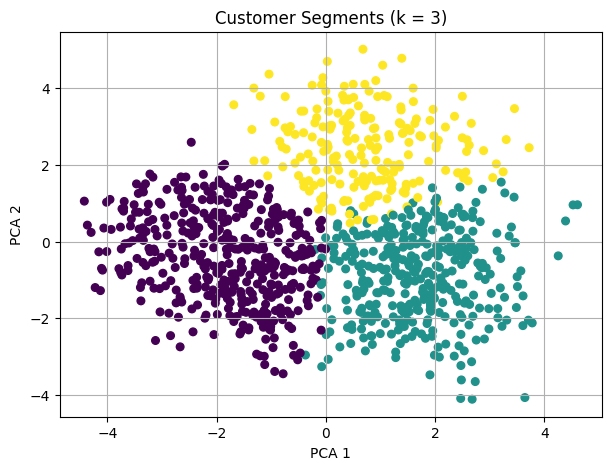

,Innov,ConstCom,CreatCom,TimelyInf,SaveM_T,SaveM_L,TaskMgm,DeviceSt,Photo,Wellness,Athlete,Style,Price
Cluster,,,,,,,,,,,,,
0,4.48,5.01,5.23,4.38,4.02,5.06,4.74,4.31,3.30,5.75,5.11,5.28,214.95
1,3.69,3.89,4.19,3.48,3.58,2.87,3.19,2.58,3.65,3.16,3.05,3.64,190.30
2,4.05,5.48,2.43,5.56,2.09,3.77,4.87,5.15,2.00,3.74,2.56,3.49,249.04


In [10]:
# Rerun K-Means with k=3
kmeans3 = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans3.fit_predict(X_scaled)

# Visualize new clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(7, 5))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', s=30)
plt.title("Customer Segments (k = 3)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# New cluster profile summary
cluster_profiles = df.groupby('Cluster')[seg_cols].mean().round(2)
cluster_profiles


In [11]:
# Run K-Means with k=3 and overwrite any existing 'Cluster' column
kmeans3 = KMeans(n_clusters=3, random_state=42)
df = df.drop(columns=['Cluster'], errors='ignore')  # remove old one if exists
df['Cluster'] = kmeans3.fit_predict(X_scaled)

# Check that there are only 3 clusters now
print(df['Cluster'].value_counts())


Cluster
0    420
1    372
2    208
Name: count, dtype: int64


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd

# Select only your segmentation variables (exclude Cluster, PCA, etc.)
X = df[seg_cols]   # seg_cols = list of your survey variables
y = df['Cluster']  # cluster assignments from k=3

# Fit LDA model
lda = LDA()
lda_fit = lda.fit(X, y)

# Transform data into discriminant space (for plotting or visualization)
lda_transformed = lda_fit.transform(X)

# Get discriminant loadings (which variables matter most)
loadings = pd.DataFrame(lda_fit.scalings_, index=seg_cols, columns=['LD1', 'LD2'])
print(loadings)


                LD1       LD2
Innov     -0.054269  0.075455
ConstCom  -0.036382  0.141401
CreatCom  -0.061998 -0.171235
TimelyInf -0.035386  0.188151
SaveM_T   -0.141345 -0.253298
SaveM_L   -0.296990  0.248476
TaskMgm   -0.139807  0.288101
DeviceSt  -0.053010  0.376969
Photo     -0.068653 -0.176505
Wellness  -0.245863  0.068693
Athlete   -0.499017 -0.061412
Style     -0.502662 -0.426898
Price      0.001063  0.003169


In [13]:
print("Segmentation dataset (df) columns:\n", df.columns.tolist())
print("\nDiscrimination dataset (df2) columns:\n", df2.columns.tolist())

Segmentation dataset (df) columns:
 ['Observations / Segmentation Variables', 'Innov', 'ConstCom', 'CreatCom', 'TimelyInf', 'SaveM_T', 'SaveM_L', 'TaskMgm', 'DeviceSt', 'Photo', 'Wellness', 'Athlete', 'Style', 'Price', 'PCA1', 'PCA2', 'Cluster']

Discrimination dataset (df2) columns:
 ['Observations / Discrimination Variables', 'iPhone', 'CompBuy', 'Health', 'Finc', 'Sales', 'Advt', 'Edu', 'Cons', 'Eng', 'Tech', 'Retail', 'SMB', 'FB_Insta', 'Twit', 'Snap', 'YouTube', 'Pod_radio', 'TV', 'NewsP', 'AmznP', 'Age', 'Female', 'Degree', 'Income']


In [14]:
# Merge the segmentation (df) and discrimination (df2) datasets
merged_df = pd.merge(
    df,
    df2,
    how='inner',
    left_on='Observations / Segmentation Variables',
    right_on='Observations / Discrimination Variables'
)

# Check the merged data
print("Merged dataset shape:", merged_df.shape)
merged_df.head()


Merged dataset shape: (1000, 42)


,Observations / Segmentation Variables,Innov,ConstCom,CreatCom,TimelyInf,SaveM_T,SaveM_L,TaskMgm,DeviceSt,Photo,...,Snap,YouTube,Pod_radio,TV,NewsP,AmznP,Age,Female,Degree,Income
0,1,3,3,5,2,4,4,3,3,3,...,0,0,0,1,0,1,38,1,1,2
1,2,5,6,2,6,2,4,6,6,2,...,1,1,1,0,1,1,38,0,2,3
2,3,7,7,3,4,2,4,4,4,1,...,0,1,1,1,1,0,42,0,1,3
3,4,4,7,4,5,3,3,4,5,1,...,1,1,1,0,1,1,35,0,2,5
4,5,7,7,2,4,2,4,2,6,1,...,1,1,1,1,1,1,36,0,1,3


In [15]:
print(merged_df.columns.tolist())

['Observations / Segmentation Variables', 'Innov', 'ConstCom', 'CreatCom', 'TimelyInf', 'SaveM_T', 'SaveM_L', 'TaskMgm', 'DeviceSt', 'Photo', 'Wellness', 'Athlete', 'Style', 'Price', 'PCA1', 'PCA2', 'Cluster', 'Observations / Discrimination Variables', 'iPhone', 'CompBuy', 'Health', 'Finc', 'Sales', 'Advt', 'Edu', 'Cons', 'Eng', 'Tech', 'Retail', 'SMB', 'FB_Insta', 'Twit', 'Snap', 'YouTube', 'Pod_radio', 'TV', 'NewsP', 'AmznP', 'Age', 'Female', 'Degree', 'Income']


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Select discrimination variables (exclude ID and segmentation columns)
disc_vars = [
    'iPhone', 'CompBuy', 'Health', 'Finc', 'Sales', 'Advt', 'Edu', 'Cons', 'Eng', 
    'Tech', 'Retail', 'SMB', 'FB_Insta', 'Twit', 'Snap', 'YouTube', 
    'Pod_radio', 'TV', 'NewsP', 'AmznP', 'Age', 'Female', 'Degree', 'Income'
]

X_disc = merged_df[disc_vars]        # predictor variables
y_disc = merged_df['Cluster']        # target (cluster labels from segmentation)

# Run LDA
lda_disc = LDA()
lda_disc_fit = lda_disc.fit(X_disc, y_disc)

# Create a dataframe of variable loadings for LD1 and LD2
disc_loadings = pd.DataFrame(
    lda_disc_fit.scalings_,
    index=disc_vars,
    columns=['LD1', 'LD2']
).round(3)

disc_loadings


,LD1,LD2
iPhone,-0.447,0.231
CompBuy,0.026,1.675
Health,0.102,-0.035
Finc,0.417,0.203
Sales,0.930,0.420
Advt,0.930,-0.179
Edu,1.147,-0.402
Cons,1.095,0.618
Eng,0.750,0.932
Tech,1.169,-0.148


/tmp/ipykernel_105/868145550.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(disc_loadings['LD1'][i] + 0.02,
/tmp/ipykernel_105/868145550.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  disc_loadings['LD2'][i] + 0.02,


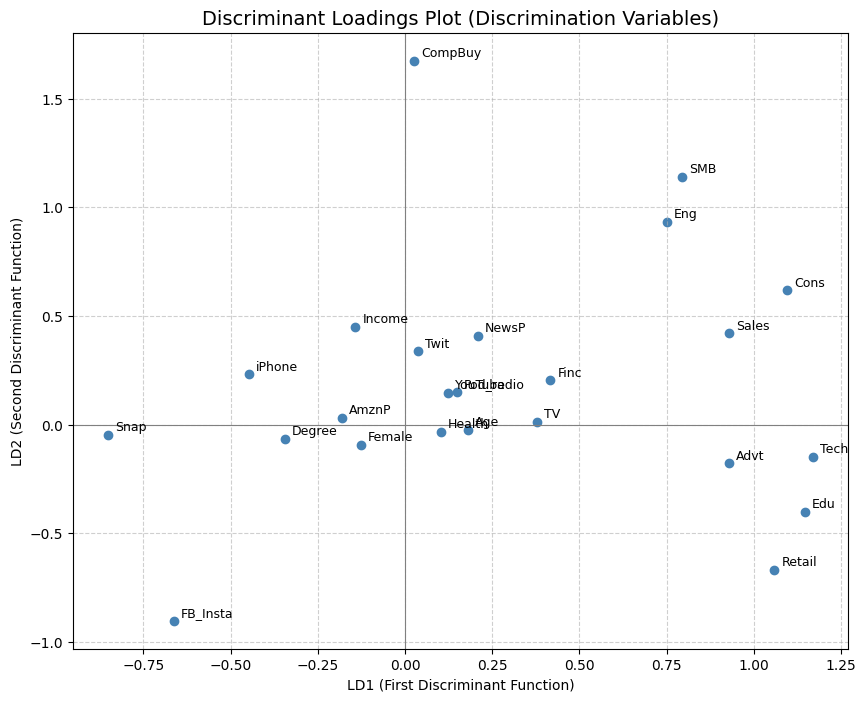

In [17]:
import matplotlib.pyplot as plt

# Assuming your loadings are stored in a DataFrame named 'disc_loadings'
# with columns ['LD1', 'LD2'] and the index as variable names

plt.figure(figsize=(10, 8))
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Plot each variable as a point
plt.scatter(disc_loadings['LD1'], disc_loadings['LD2'], color='steelblue')

# Add text labels for each variable
for i, var in enumerate(disc_loadings.index):
    plt.text(disc_loadings['LD1'][i] + 0.02,
             disc_loadings['LD2'][i] + 0.02,
             var,
             fontsize=9)

plt.title("Discriminant Loadings Plot (Discrimination Variables)", fontsize=14)
plt.xlabel("LD1 (First Discriminant Function)")
plt.ylabel("LD2 (Second Discriminant Function)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


/tmp/ipykernel_105/1003232001.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(disc_loadings['LD1'][i] + 0.03,
/tmp/ipykernel_105/1003232001.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  disc_loadings['LD2'][i] + 0.03,


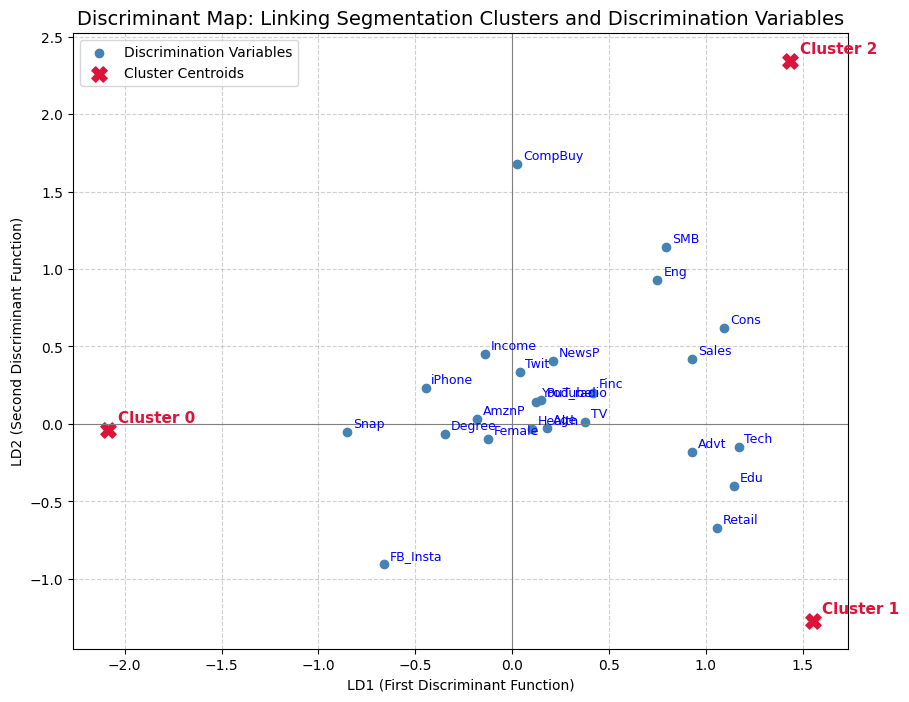

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Assume you already have these ---
# lda_transformed = lda_fit.transform(X)   # from your segmentation dataset
# y = df['Cluster']                        # cluster labels
# disc_loadings = your discrimination loadings dataframe

# --- Step 2: Create a dataframe for the LDA scores (to find cluster centroids) ---
lda_scores = pd.DataFrame(lda_transformed, columns=['LD1', 'LD2'])
lda_scores['Cluster'] = y

# --- Step 3: Calculate cluster centroids (average LD1 & LD2 per cluster) ---
centroids = lda_scores.groupby('Cluster')[['LD1', 'LD2']].mean()

# --- Step 4: Plot both discrimination variables and cluster centroids ---
plt.figure(figsize=(10, 8))
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Plot discrimination variables
plt.scatter(disc_loadings['LD1'], disc_loadings['LD2'], color='steelblue', label='Discrimination Variables')

# Add text labels for discrimination variables
for i, var in enumerate(disc_loadings.index):
    plt.text(disc_loadings['LD1'][i] + 0.03,
             disc_loadings['LD2'][i] + 0.03,
             var,
             fontsize=9,
             color='blue')

# Plot cluster centroids
plt.scatter(centroids['LD1'], centroids['LD2'], color='crimson', s=120, marker='X', label='Cluster Centroids')

# Add text labels for centroids
for i in centroids.index:
    plt.text(centroids['LD1'][i] + 0.05,
             centroids['LD2'][i] + 0.05,
             f'Cluster {i}',
             fontsize=11,
             color='crimson',
             fontweight='bold')

# --- Step 5: Styling ---
plt.title("Discriminant Map: Linking Segmentation Clusters and Discrimination Variables", fontsize=14)
plt.xlabel("LD1 (First Discriminant Function)")
plt.ylabel("LD2 (Second Discriminant Function)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


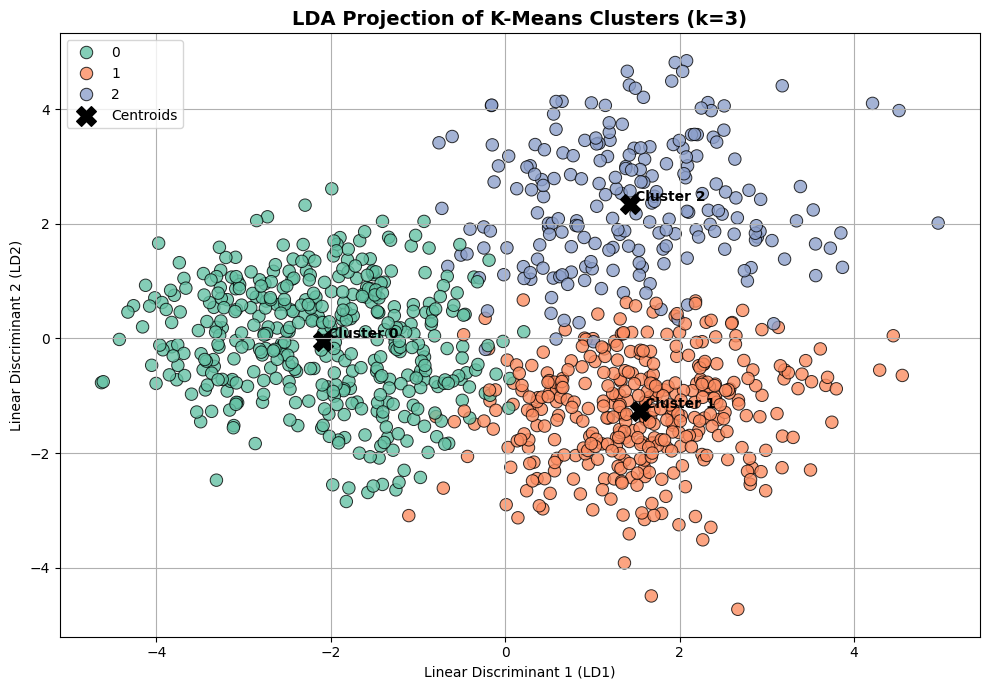

In [22]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a dataframe called df (segmentation dataset)
# and that you already have kmeans labels stored in df['Cluster']

# Separate features and labels
seg_cols = [
    'Innov', 'ConstCom', 'CreatCom', 'TimelyInf', 'SaveM_T', 'SaveM_L', 'TaskMgm', 
    'DeviceSt', 'Photo', 'Wellness', 'Athlete', 'Style', 'Price'
]
X = df[seg_cols]
y = df['Cluster']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run LDA for visualization (2 components)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create DataFrame for LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['Cluster'] = y

# Plot the LDA clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='LD1', y='LD2',
    hue='Cluster',
    palette='Set2',
    data=lda_df,
    s=80, alpha=0.8, edgecolor='black'
)

# Add cluster centroids (mean LD1, LD2 per cluster)
centroids = lda_df.groupby('Cluster')[['LD1', 'LD2']].mean().reset_index()
plt.scatter(centroids['LD1'], centroids['LD2'], 
            c='black', s=200, marker='X', label='Centroids')

# Annotate centroids
for i, row in centroids.iterrows():
    plt.text(row['LD1'] + 0.05, row['LD2'] + 0.05, f"Cluster {int(row['Cluster'])}",
             fontsize=10, weight='bold')

# Labels and title
plt.title("LDA Projection of K-Means Clusters (k=3)", fontsize=14, weight='bold')
plt.xlabel("Linear Discriminant 1 (LD1)")
plt.ylabel("Linear Discriminant 2 (LD2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e68617d-ea43-4e08-a58b-f90aeca6835a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>